#Day 3

In [1]:
# Here in Google Colab we ALWAYS need to INSTALL the 
# SEGYIO library
!pip install segyio

In [2]:
# After I install the library, I need to IMPORT IT
import segyio 
import numpy as np
import matplotlib.pyplot as plt

We need to storage the location of our file into a variable:

In [3]:
filename = ('Penobscot_0-1000ms.sgy')

And now we can import our volumen into our notebook:

In [4]:
# Use segyio

with segyio.open(filename) as s:
    cube3d = segyio.cube(s)

In [5]:
help(segyio.open)

Help on function open in module segyio.open:

open(filename, mode='r', iline=189, xline=193, strict=True, ignore_geometry=False, endian='big')
    Open a segy file.
    
    Opens a segy file and tries to figure out its sorting, inline numbers,
    crossline numbers, and offsets, and enables reading and writing to this
    file in a simple manner.
    
    For reading, the access mode `r` is preferred. All write operations will
    raise an exception. For writing, the mode `r+` is preferred (as `rw` would
    truncate the file). Any mode with `w` will raise an error. The modes used
    are standard C file modes; please refer to that documentation for a
    complete reference.
    
    Open should be used together with python's ``with`` statement. Please refer
    to the examples. When the ``with`` statement is used the file will
    automatically be closed when the routine completes or an exception is
    raised.
    
    By default, segyio tries to open in ``strict`` mode. This means 

Let's going to check the size of the loaded volume:

In [6]:
cube3d.shape

(601, 481, 251)

In [7]:
type(cube3d)

numpy.ndarray

In [8]:
print('INLINES: ', cube3d.shape[0])
print('XLINES: ', cube3d.shape[1])
print('TIME SLICES: ', cube3d.shape[2])

INLINES:  601
XLINES:  481
TIME SLICES:  251


## Plot

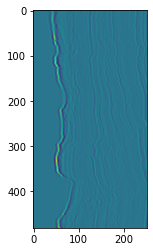

In [9]:
plt.imshow(cube3d[300, :, :])

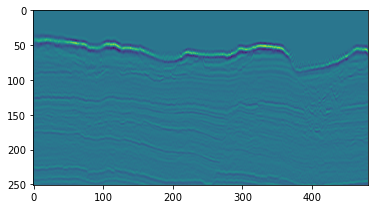

In [10]:
plt.imshow(cube3d[300, :, :].T)

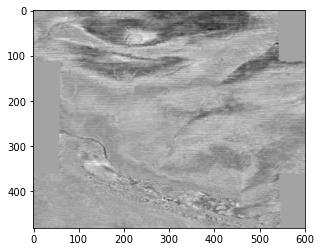

In [11]:
plt.imshow(cube3d[:, :, 125].T, cmap = 'gray')

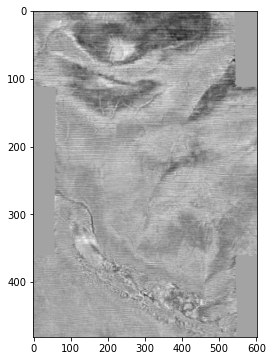

In [12]:
plt.figure(figsize=(4, 6))
plt.imshow(cube3d[:, :, 125].T, cmap = 'gray', aspect='auto')

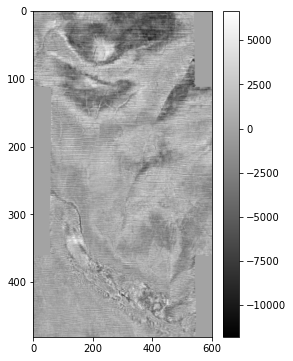

In [13]:
plt.figure(figsize=(4, 6))
plt.imshow(cube3d[:, :, 125].T, cmap = 'gray', aspect='auto')
plt.colorbar()

In [14]:
amplitude_max = np.percentile(cube3d, 98)
amplitude_max

4247.0

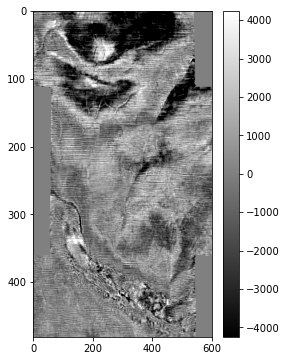

In [15]:
plt.figure(figsize=(4, 6))
plt.imshow(cube3d[:, :, 125].T, cmap = 'gray', aspect='auto', vmin = -amplitude_max, vmax = amplitude_max)

plt.colorbar()

Text(0.5, 1.0, 'TIMESLICE 125')

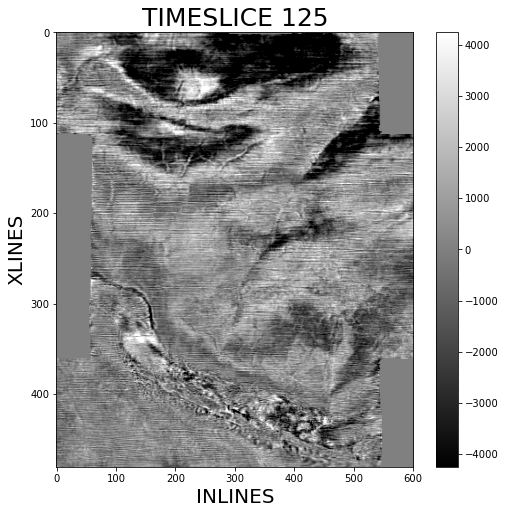

In [16]:
timeslice = 125

plt.figure(figsize=(8, 8))
plt.imshow(cube3d[:, :, timeslice].T, cmap = 'gray', aspect='auto', vmin = -amplitude_max, vmax = amplitude_max)
plt.colorbar()
plt.xlabel('INLINES', fontsize = 20)
plt.ylabel('XLINES', fontsize = 20)
plt.title('TIMESLICE %d' %timeslice, fontsize = 25)

INLINES:  601
XLINES:  481
TIME SLICES:  251


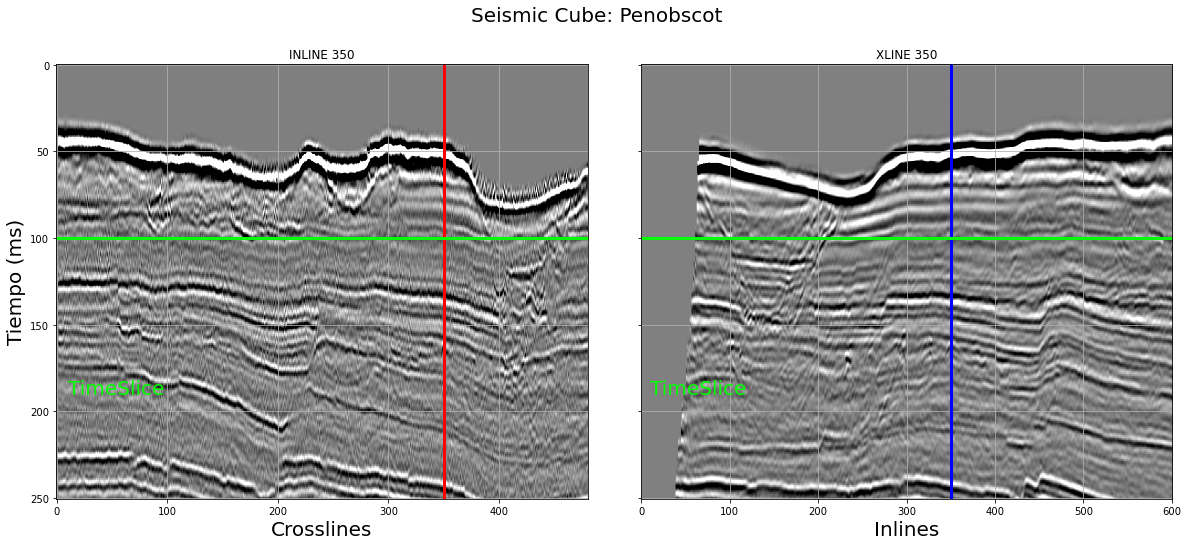

In [17]:
print('INLINES: ', cube3d.shape[0])
print('XLINES: ', cube3d.shape[1])
print('TIME SLICES: ', cube3d.shape[2])

inline = 350
xline = 350
timeslice = 100

fig, ax = plt.subplots(1,2, figsize=(20,8), sharey = True)
fig.suptitle('Seismic Cube: Penobscot', fontsize=20)

ax[0].imshow(cube3d[inline, :, :].T, cmap='gray', vmax=amplitude_max, vmin=-amplitude_max, aspect='auto')
ax[0].set_xlabel('Crosslines', fontsize = 20)
ax[0].set_ylabel('Tiempo (ms)', fontsize = 20)
ax[0].set_title('INLINE %i' %inline)
ax[0].axvline(x=xline, c = 'red', linewidth = 3)
ax[0].axhline(y=timeslice, c = 'lime', linewidth = 3)
ax[0].text(10, 190, 'TimeSlice', c = 'lime', fontsize = 20)
ax[0].grid()

ax[1].imshow(cube3d[:, xline, :].T, cmap='gray', vmax=amplitude_max, vmin=-amplitude_max, aspect='auto')
ax[1].set_xlabel('Inlines', fontsize = 20)
ax[1].set_title('XLINE %i' %xline)
ax[1].axvline(x=inline, c = 'blue', linewidth = 3)
ax[1].axhline(y=timeslice, c = 'lime', linewidth = 3)
ax[1].text(10, 190, 'TimeSlice', c = 'lime', fontsize = 20)
ax[1].grid()

plt.subplots_adjust(wspace=0.1)

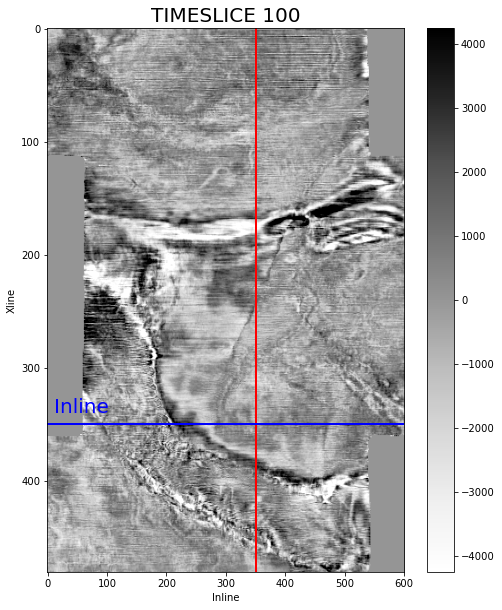

In [18]:
# Plot seismic

inline = 350
xline = 350
timeslice = 100

plt.figure(figsize=(8,10))
plt.imshow(cube3d[:,:,100].T, vmin=-amplitude_max, vmax = amplitude_max, cmap = 'Greys', aspect='auto')
plt.colorbar()
plt.title('TIMESLICE %i' %timeslice, fontsize=20)
plt.xlabel('Inline')
plt.ylabel('Xline')
plt.axvline(x=xline, c = 'red', linewidth = 2)
plt.axhline(y=inline, c = 'blue', linewidth = 2)
plt.text(10, inline-10, 'Inline', c = 'blue', fontsize = 20)
plt.show()

# Interactive Seismic (JUST WORK ON JUPYTER NOTEBOOK)

In [65]:
import numpy as np 
import segyio
import matplotlib.pyplot as plt
import scipy 
from scipy import ndimage as ndi
from shutil import copyfile
from skimage import exposure
from ipywidgets import interact
import ipywidgets as widgets

In [66]:
def seismic_plotter(colormap, section, inline, xline, timeslice, volume):
    """Plot a given seismic ILine, XLine or Timeslice with a choice of colormaps"""
    # load a seismic volume
    vol = load_seismic(volume)
    
    # display options for different sections
    sections = {
        'inline': {'amp': vol[inline,:,:].T, 'line': inline, 'shrink_val': 0.6, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': xline, 'axvline_c': 'g',
                  'axspine_c': 'r',
                  'aspect': 1
                  },
        'xline': {'amp': vol[:,xline,:].T, 'line': xline, 'shrink_val': 0.5, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'g',
                  'aspect': 1
                 },
        'timeslice': {'amp': vol[:,:,timeslice], 'line': timeslice, 'shrink_val': 0.95, 
                  'axhline_y': xline, 'axhline_c': 'g', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'b',
                  'aspect': 0.5
                 },
    }
# scale amplitudes
    ma = np.percentile(vol, 98)
    
    # plot figure
    fig, ax = plt.subplots(figsize=(18, 6), ncols=1)

    # apply options
    sec = sections[section]    
    im = ax.imshow(sec['amp'], aspect=sec['aspect'], vmin=-ma, vmax=ma, cmap=colormap)
    ax.set_title(f'Penobscot_0-1000ms {section} {sec["line"]}', fontsize=18)
    plt.colorbar(im, ax=ax, shrink=sec['shrink_val']).set_label('Amplitudes')
     
    # add projected lines
    ax.axhline(y=sec['axhline_y'], linewidth=1.5, color=sec['axhline_c'])
    ax.axvline(x=sec['axvline_x'], linewidth=1.5, color=sec['axvline_c'])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)     
        ax.spines[axis].set_color(sec['axspine_c'])
    
    return

In [67]:

_ = interact(seismic_plotter,
             colormap=['Greys', 'Greys_r', 'seismic', 'seismic_r', 'viridis', 'plasma', 'inferno', 'magma'],
             section=widgets.RadioButtons(options=['inline', 'xline', 'timeslice'],
                                          value='inline',description='slicer',disabled=False),
             inline=widgets.IntSlider(value=300,min=0,max=600,step=1,continuous_update=False,
                                      description='<font color="red">inline</>'),
             xline=widgets.IntSlider(value=240,min=0,max=480,step=1,continuous_update=False,
                                     description='<font color="green">xline</>'),
             timeslice=widgets.IntSlider(value=125,min=0,max=250,step=1,continuous_update=False,
                                         description='<font color="blue">timeslice</>'),
             volume='Penobscot_0-1000ms.sgy',
            )

interactive(children=(Dropdown(description='colormap', options=('Greys', 'Greys_r', 'seismic', 'seismic_r', 'v…

### Extract a single trace of my cube:

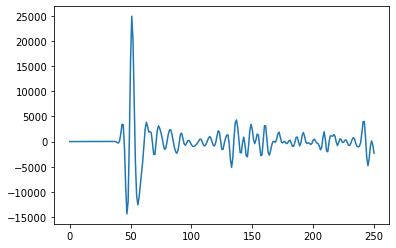

In [22]:
trace = cube3d[350,350,:]
plt.plot(trace)

In [23]:
len(trace)

251

In [24]:
time = np.linspace(0, len(trace), len(trace))

In [25]:
len(time)

251

In [26]:
len(time) == len(trace)

True

Text(0, 0.5, 'Time(ms)')

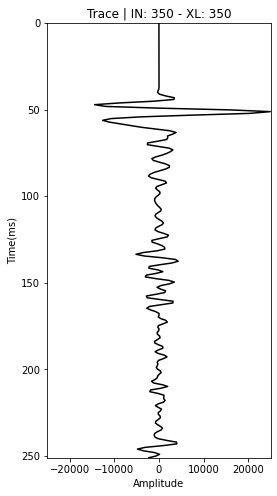

In [27]:
trace = cube3d[350,350,:]
plt.figure(figsize = (4,8))
plt.plot(trace, time, color = 'black')
plt.ylim(251,0)
plt.xlim(-25000, 25000)
plt.title('Trace | IN: 350 - XL: 350')
plt.xlabel('Amplitude')
plt.ylabel('Time(ms)')
#plt.fill_between(trace, time, 0,  trace < 0.0, color='black')

# Frequency of Trace
This applies to any input signal. For that we need to use the SciPy library.

In [28]:
a = 2**3
a

8

In [29]:
from scipy import special

In [30]:
a = special.exp10(2)
print(a)

100.0


In [31]:
b = special.exp2(3)
print(b)

8.0


In SciPy we can also have trigonometric functions. For example:

In [32]:
c = special.sindg(90)
print(c)

1.0


Let's make a simple example to demostrate how the frequency extraction with SciPy works:

In [33]:
n = 1000
tx = 200
w = 2.0 * np.pi/tx 

In [34]:
t = np.linspace (0, tx, n)
s1 = 2.0*np.cos(2.0*w*t)

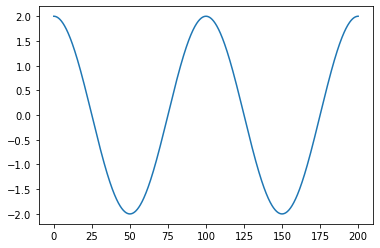

In [35]:
plt.plot(t, s1)

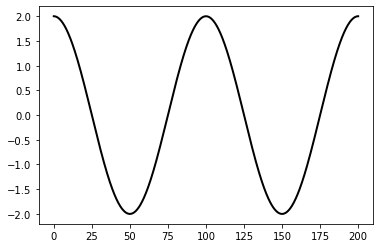

In [36]:
plt.plot(t,s1, lw=2, color='black')

In [37]:
s2 = 1.0*np.cos(30*w*t)

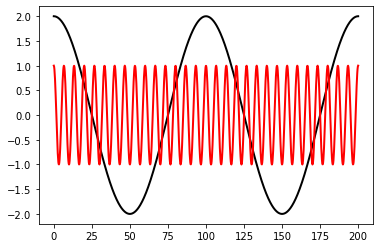

In [38]:
plt.plot(t,s1, lw=2, color='black')
plt.plot(t,s2, lw=2, color='red')

In [39]:
s = s1 + s2

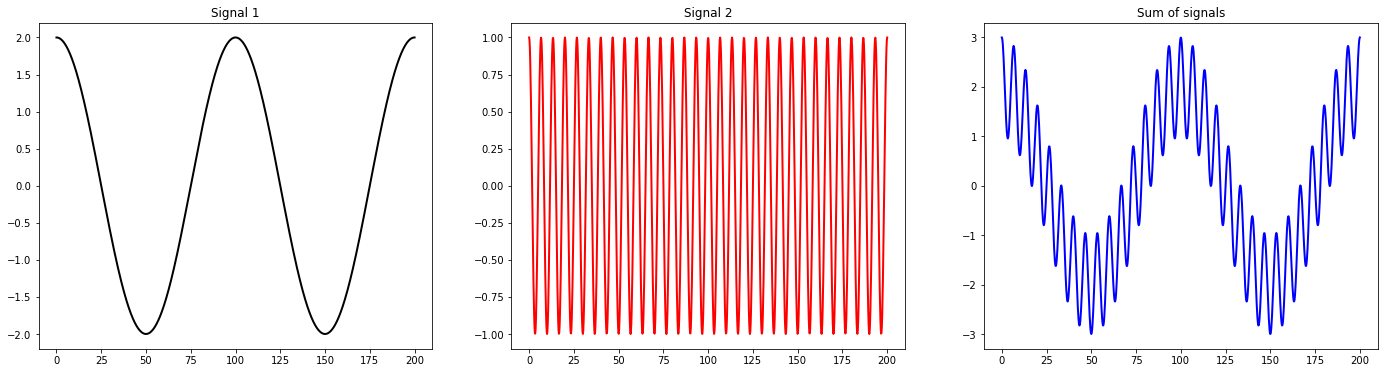

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (24,6))
ax[0].plot(t,s1, lw=2, color='black')
ax[0].title.set_text('Signal 1')
ax[1].plot(t,s2, lw=2, color='red')
ax[1].title.set_text('Signal 2')
ax[2].plot(t,s, lw=2, color='blue')
ax[2].title.set_text('Sum of signals')

### Method 1: Using Numpy

In [41]:
freq = np.fft.fftfreq(n)
mask = freq > 0 # This is because I only want the POSITIVE values

# Calculate the FFT, but only the absolute value
fft_s1 = 2*abs((np.fft.fft(s1))/n)
fft_s2 = 2*abs((np.fft.fft(s2))/n)
fft_s = 2*abs((np.fft.fft(s))/n)

(0.0, 0.05)

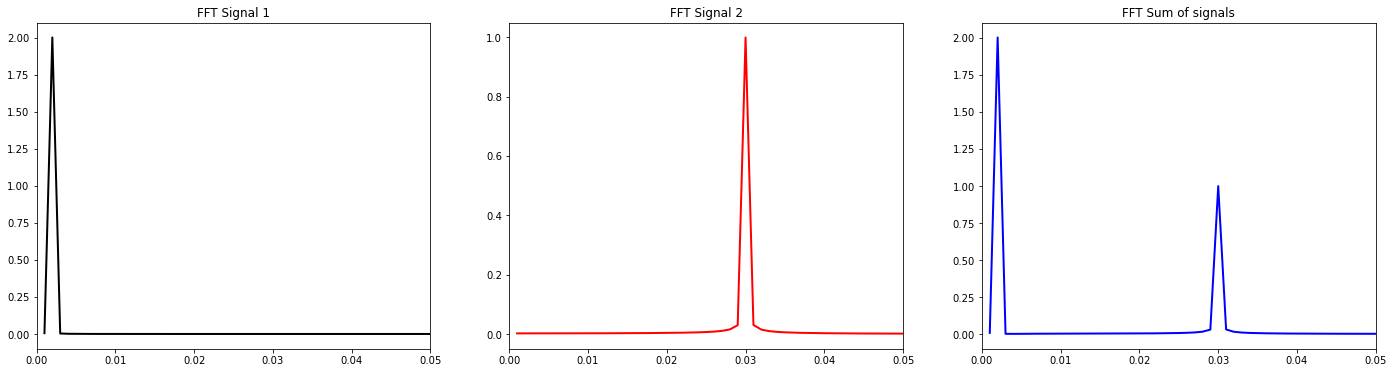

In [42]:
fig, ax = plt.subplots(1, 3, figsize = (24,6))
ax[0].plot(freq[mask],fft_s1[mask], lw=2, color='black')
ax[0].title.set_text('FFT Signal 1')
ax[0].set_xlim(0,0.05)
ax[1].plot(freq[mask],fft_s2[mask], lw=2, color='red')
ax[1].title.set_text('FFT Signal 2')
ax[1].set_xlim(0,0.05)
ax[2].plot(freq[mask],fft_s[mask], lw=2, color='blue')
ax[2].title.set_text('FFT Sum of signals')
ax[2].set_xlim(0,0.05)

# RICKER WAVELET - FFT USING NUMPY

(0.0, 100.0)

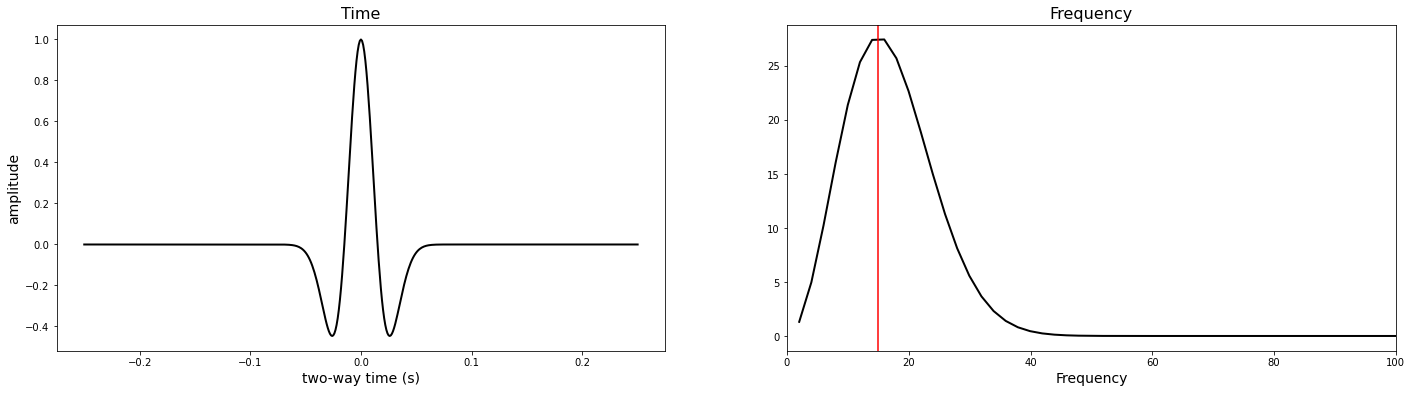

In [43]:
import numpy as np
import matplotlib.pyplot as plt

f = 15 # Hz
tn = 500 # ms in time
dt = 1 # sample rate

t = np.arange(-tn / 2, tn / 2 + dt, dt) / 1000
n = len(t)

# Now my signal is the Ricker Wavelet
ricker = (1 - 2 * np.pi**2 * f**2 * t**2) * np.exp(-np.pi**2 * f**2 * t**2)

# Calculate the FFT of the Ricker Wavelet
freq = np.fft.fftfreq(n)
mask = freq > 0 # only the positive values

fft_calc = abs(np.fft.fft(ricker)) # Calculate the one-dimensional FFT

fig,ax =  plt.subplots(1,2, figsize=(24,6))

ax[0].plot(t,ricker, lw=2, color='black')
ax[0].set_title('Time', fontsize = 16 )
ax[0].set_xlabel( 'two-way time (s)', fontsize = 14)
ax[0].set_ylabel('amplitude', fontsize = 14)

ax[1].plot(freq[mask]*1000, fft_calc[mask], lw=2, color='black')
ax[1].set_title('Frequency', fontsize = 16 )
ax[1].set_xlabel( 'Frequency', fontsize = 14)
ax[1].axvline(x = f, c = 'red')
ax[1].set_xlim((0,100))

Retruning to the Trace exercise, let's calculate the FFT of our trace:

In [44]:
len(trace)

251

(0.0, 250.0)

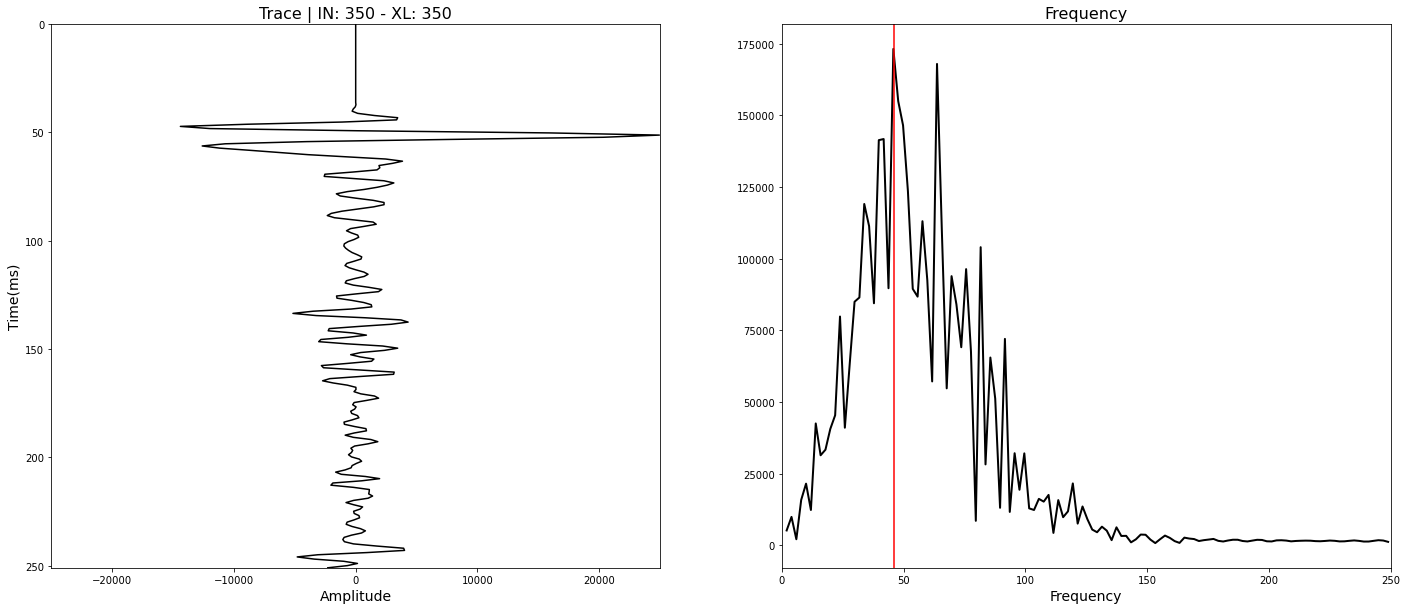

In [45]:
# Trace from our cube
trace = cube3d[350,350,:]
n = len(trace)

# FFT of the trace
freq_trace = np.fft.fftfreq(n)
mask_trace = freq_trace > 0 # only the positive values

fft_trace = abs(np.fft.fft(trace)) # Calculate the one-dimensional FFT

# Plot

fig,ax =  plt.subplots(1,2, figsize=(24,10))

ax[0].plot(trace, time, color = 'black')
ax[0].set_ylim(251,0)
ax[0].set_title('Trace | IN: 350 - XL: 350', fontsize = 16 )
ax[0].set_xlabel( 'Amplitude', fontsize = 14)
ax[0].set_ylabel('Time(ms)', fontsize = 14)
ax[0].set_xlim((-25000,25000))

ax[1].plot(freq_trace[mask_trace]*500, fft_trace[mask_trace], lw=2, color='black')
ax[1].set_title('Frequency', fontsize = 16 )
ax[1].set_xlabel( 'Frequency', fontsize = 14)
ax[1].axvline(x = 46, c = 'red')
ax[1].set_xlim((0,250))

# Seismic Attributes

In [46]:
# Let's select two traces, 100 inlines apart in the same Xline
trace1 = cube3d[350,350,:]
trace2 = cube3d[450,350,:]

np.corrcoef(trace1, trace1)

array([[1., 1.],
       [1., 1.]])

In [47]:
np.corrcoef?

In [48]:
np.correlate(trace1, trace1)

array([2.8294042e+09], dtype=float32)

In [49]:
#np.correlate?

In [50]:
np.correlate(trace1, trace2)

array([-1.2090127e+09], dtype=float32)

Select a SMALL cube in order to perform the calculation:

In [51]:
subCube = cube3d[250:350, 200:300, 100:200]

In [52]:
cube3d.shape

(601, 481, 251)

In [53]:
subCube.shape

(100, 100, 100)

Let's create a oytput EMPTY variable with the same dimensions of the seismic cube we want to calculate the attribute (subCube).

In [54]:
ni, nj, nk = subCube.shape

In [55]:
out = np.zeros_like(subCube)

In [56]:
out.shape

(100, 100, 100)

In [57]:
def coherence(data, zwin):
    ni, nj, nk = data.shape
    out = np.zeros_like(data)
    
    # Pad the input to make indexing simpler. We're not concerned about memory usage.
    # We'll handle the boundaries by "reflecting" the data at the edge.
    padded = np.pad(data, ((0, 1), (0, 1), (zwin//2, zwin//2)), mode='reflect')

    for i, j, k in np.ndindex(ni, nj, nk):
        # Extract the "full" center trace
        center_trace = data[i,j,:]
        
        # Use a "moving window" portion of the adjacent traces
        x_trace = padded[i+1, j, k:k+zwin]
        y_trace = padded[i, j+1, k:k+zwin]

        # Cross correlate. `xcor` & `ycor` will be 1d arrays of length
        # `center_trace.size - x_trace.size + 1`
        xcor = np.correlate(center_trace, x_trace)
        ycor = np.correlate(center_trace, y_trace)
        
        # The result is the maximum normalized cross correlation value
        center_std = center_trace.std()
        px = xcor.max() / (xcor.size * center_std * x_trace.std())
        py = ycor.max() / (ycor.size * center_std * y_trace.std())
        out[i,j,k] = np.sqrt(px * py)

    return out

In [58]:
volume_coherence = coherence(subCube, 10)

Text(0.5, 1.0, 'Xline - Amplitude | Coherence')

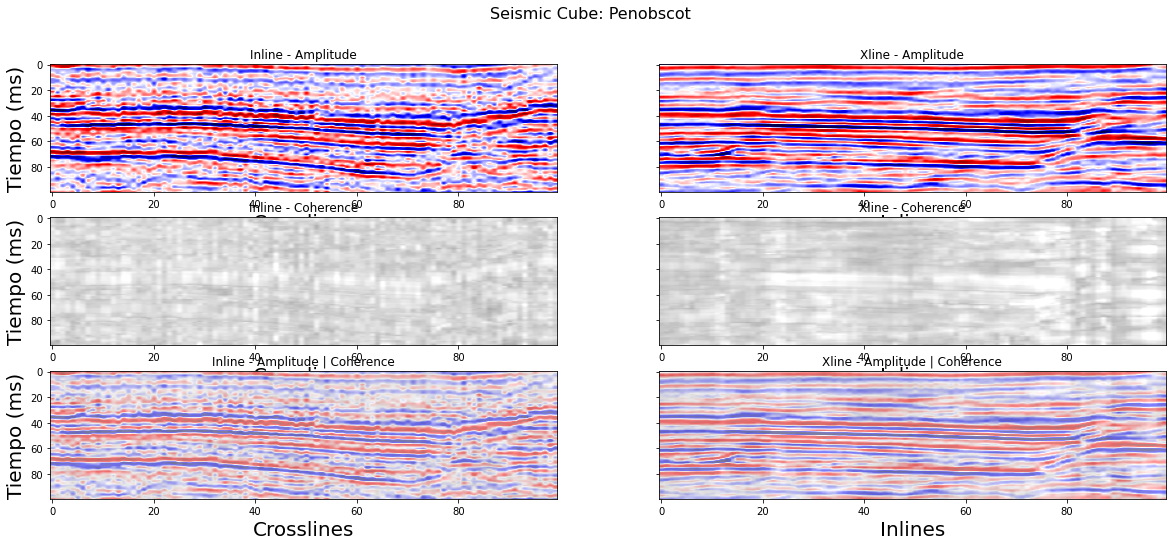

In [61]:
coherence_max = np.percentile(volume_coherence, 98)
amplitude_maxima = np.percentile(cube3d, 98)

fig, ax = plt.subplots(3,2, figsize=(20,8), sharey = True)
fig.suptitle('Seismic Cube: Penobscot', fontsize=16)

ax[0][0].imshow(subCube[50, :, :].T, cmap='seismic', vmax=amplitude_maxima, vmin=-amplitude_maxima, aspect='auto')
ax[0][0].set_xlabel('Crosslines', fontsize = 20)
ax[0][0].set_ylabel('Tiempo (ms)', fontsize = 20)
ax[0][0].set_title('Inline - Amplitude')


ax[0][1].imshow(subCube[:, 50, :].T, cmap='seismic', vmax=amplitude_maxima, vmin=-amplitude_maxima, aspect='auto')
ax[0][1].set_xlabel('Inlines', fontsize = 20)
ax[0][1].set_title('Xline - Amplitude')

ax[1][0].imshow(volume_coherence[50, :, :].T, cmap='gray', vmax=coherence_max, vmin=-coherence_max, aspect='auto')
ax[1][0].set_xlabel('Crosslines', fontsize = 20)
ax[1][0].set_ylabel('Tiempo (ms)', fontsize = 20)
ax[1][0].set_title('Inline - Coherence')

ax[1][1].imshow(volume_coherence[:, 50, :].T, cmap='gray', vmax=coherence_max, vmin=-coherence_max, aspect='auto')
ax[1][1].set_xlabel('Inlines', fontsize = 20)
ax[1][1].set_title('Xline - Coherence')

ax[2][0].imshow(subCube[50, :, :].T, cmap='seismic', vmax=amplitude_maxima, vmin=-amplitude_maxima, aspect='auto')
ax[2][0].imshow(volume_coherence[50, :, :].T, cmap='gray', vmax=coherence_max, vmin=-coherence_max, aspect='auto', alpha = 0.5)
ax[2][0].set_xlabel('Crosslines', fontsize = 20)
ax[2][0].set_ylabel('Tiempo (ms)', fontsize = 20)
ax[2][0].set_title('Inline - Amplitude | Coherence')

ax[2][1].imshow(subCube[:, 50, :].T, cmap='seismic', vmax=amplitude_maxima, vmin=-amplitude_maxima, aspect='auto')
ax[2][1].imshow(volume_coherence[:, 50, :].T, cmap='gray', vmax=coherence_max, vmin=-coherence_max, aspect='auto', alpha = 0.5)
ax[2][1].set_xlabel('Inlines', fontsize = 20)
ax[2][1].set_title('Xline - Amplitude | Coherence')
#plt.subplots_adjust(hspace=0.) 

In [ ]:
# Plot seismic

coherence_max = np.percentile(volume_coherence, 98)

ma = np.percentile(c, 98)
plt.figure(figsize=(8,10))
plt.imshow(volume_coherence[:,:,50].T, vmax=coherence_max, vmin=-coherence_max, cmap = 'gray', aspect='auto')
plt.title('TIMESLICE 50', fontsize=20)
plt.xlabel('Inline')
plt.ylabel('Xline')
plt.colorbar()
plt.show()